# Cristina Venturini 2022461

## Assignment 7

In [1]:
library(tibble)
library(ggplot2)
library(latex2exp)
theme_set(theme_bw())

Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'latex2exp' was built under R version 3.6.3"

## Exercise 1

A well established and diffused method for detecting a disease in blood fails to detect the presence of disease in $15 \%$ of the patients that actually have the disease. <br>
A young UniPD startUp has developed an innovative method of screening. During the qualification phase, a random sample of $n = 75$ patients known to have the disease is screened using the new method.

### 1.1

What is the probability distribution of $y$, the number of times the new method fails to detect the disease ?

A binomial distribution.

### 1.2

In the $n = 75$ patients sample, the new method fails to detect the disease in $y = 6$ cases. What is the frequentist estimator of the failure probability of the new method?

In [2]:
y = 6
n = 75
p_freq = y/n

In [3]:
cat('Frequentist estimator:', round(p_freq,3))

Frequentist estimator: 0.08

### 1.3

Setup a bayesian computation of the posterior probability, assuming a beta distribution with mean value $0.15$ and standard deviation $0.14$. Plot the posterior distribution for $y$, and mark on the plot the mean value and variance.

Given a Beta distribution with a certain mean $\mu$ and standard deviation $\sigma$, the parameter $\alpha$ and $\beta$ are found as follows: 

$$\alpha = \left(\frac{1-\mu}{\sigma^2}-\frac{1}{\mu}\right)\mu^2$$

$$\beta = \alpha\left(\frac{1}{\mu}-1\right)$$

In [4]:
n_p = 1001
p = seq(0, 1, length.out=n_p)
delta.p = p[2] - p[1]

In [5]:
m = 0.15
st_dev = 0.14
alpha_pr = m^2*((1-m)/(st_dev^2)-1/m)
beta_pr = alpha_pr*(-1+1/m)
alpha = alpha_pr + 6
beta = beta_pr +75 - 6z
m_pt = alpha/(alpha+beta)
st_dev_pt =sqrt((alpha*beta)/((alpha+beta)^2*(alpha+beta+1)))
beta_post = dbeta(p, alpha, beta)/(delta.p*sum(dbeta(p, alpha, beta)))
beta_prior = dbeta(p, alpha_pr, beta_pr)#/(delta.p*sum(dbeta(p, alpha_pr, beta_pr)))

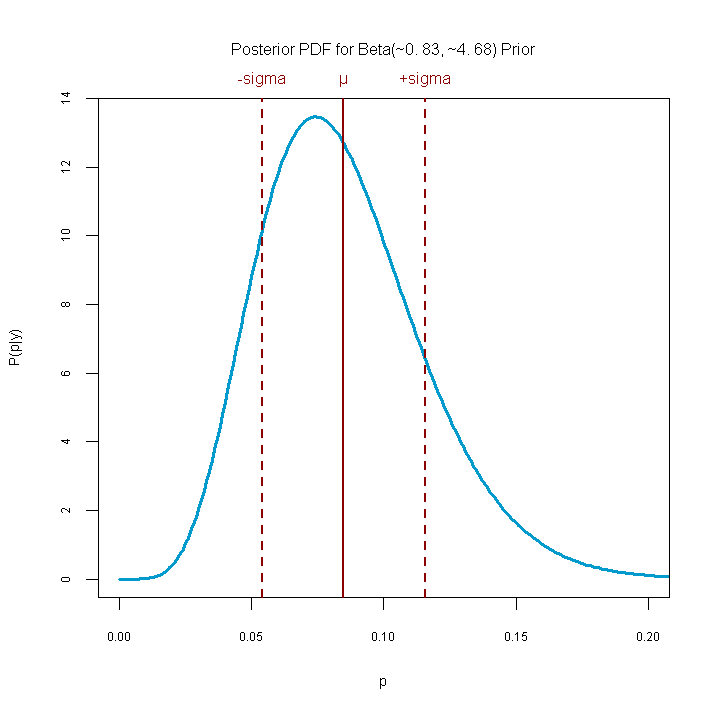

In [6]:
options(repr.plot.width=6, repr.plot.height=6)
plot(p, beta_post, main = TeX("Posterior PDF for Beta(~0.83, ~4.68) Prior"), xlim = c(0,0.2),
     col="deepskyblue3", xlab = TeX('$p$'), ylab = TeX('$P(p|y)$'), cex.lab=0.7, cex.axis=0.6, cex.main=0.8, type='l', lwd=3)
abline(v = m_pt, col="darkred", lwd=2, lty=1)
abline(v = m_pt + st_dev_pt, col="darkred", lwd=2, lty=2)
abline(v = m_pt - st_dev_pt, col="darkred", lwd=2, lty=2)
text(m_pt, 14, labels=expression("µ"), pos=3, cex=0.8, col="darkred",  xpd=TRUE)
text(m_pt + st_dev_pt, 14, labels=expression("+sigma"), pos=3, cex=0.8, col="darkred",  xpd=TRUE)
text(m_pt - st_dev_pt, 14, labels=expression("-sigma"), pos=3, cex=0.8, col="darkred",  xpd=TRUE)

### 1.4

Perform a test of hypothesis assuming that if the probability of failing to detect the disease in ill patients is greater or equal than $15 \%$, the new test is no better than the traditional method. Test the sample at a $5 \%$ level of significance in the Bayesian way.

In [7]:
est_beta = qbeta(c(0.025,0.975), alpha, beta)0

In [8]:
cat('\n95% credibility interval:', round(est_beta[1],3), '-', round(est_beta[2],3))


95% credibility interval: 0.035 - 0.154

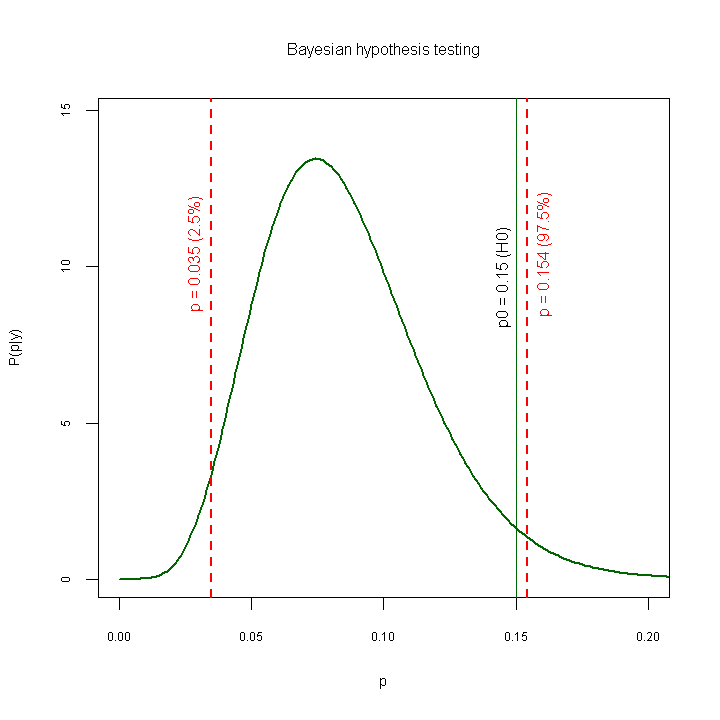

In [9]:
p.H0 = 0.15
options(repr.plot.width=6, repr.plot.height=6)
plot(p, beta_post, main = TeX("Bayesian hypothesis testing"),
     xlim=c(0,0.2), ylim=c(0,1.1*max(beta_post)),
     col="darkgreen", xlab = TeX('$p$'), ylab = TeX('$P(p|y)$'), 
     cex.lab=0.7, cex.axis=0.6, cex.main=0.8, type='l', lwd=2)
abline(v = est_beta[1], col="red", lwd=2, lty=2)
abline(v = est_beta[2], col="red", lwd=2, lty=2)
abline(v = p.H0, col="darkgreen", lwd=1, lty=1)
text(0.9*est_beta[1], 10, labels=expression("p = 0.035 (2.5%)"), srt=90, pos=3, cex=0.8, col="red",  xpd=TRUE)
text(1.06*est_beta[2], 10, labels=expression("p = 0.154 (97.5%)"), srt=90, pos=3, cex=0.8, col="red",  xpd=TRUE)
text(0.95*p.H0, 10, labels=expression('p0 = 0.15 (H0)'), pos=1, srt=90, cex=0.8, col="black", xpd=TRUE)

The null hypothesis $H_0$ is accepted at a significance level of $5\%$ since $p_0$ lies in the acceptance region.

### 1.5 

Perform the same hypothesis test in the classical frequentist way.

In [10]:
alpha_sig = 0.05

x_test = seq.int(0, n, 1)
p_test = pbinom(x_test, n, p.H0)
x_ac = x_test[p_test>0.025 & p_test<0.975] # accepted values
x_rl = x_test[p_test<=0.025] # left rejected values
x_rr = x_test[p_test>=0.975] # right rejected values
pp_test = dbinom(x_test, n, p.H0)

In [11]:
colors = c(rep("darkred", length(x_rl)), rep("deepskyblue3",  length(x_ac)), rep("darkred", length(x_rr)))
density = c(rep(40, length(x_rl)), rep(100, length(x_ac)), rep(40, length(x_rr)))
angle = c(rep(45, length(x_rl)), rep(0, length(x_ac)), rep(135, length(x_rr)))

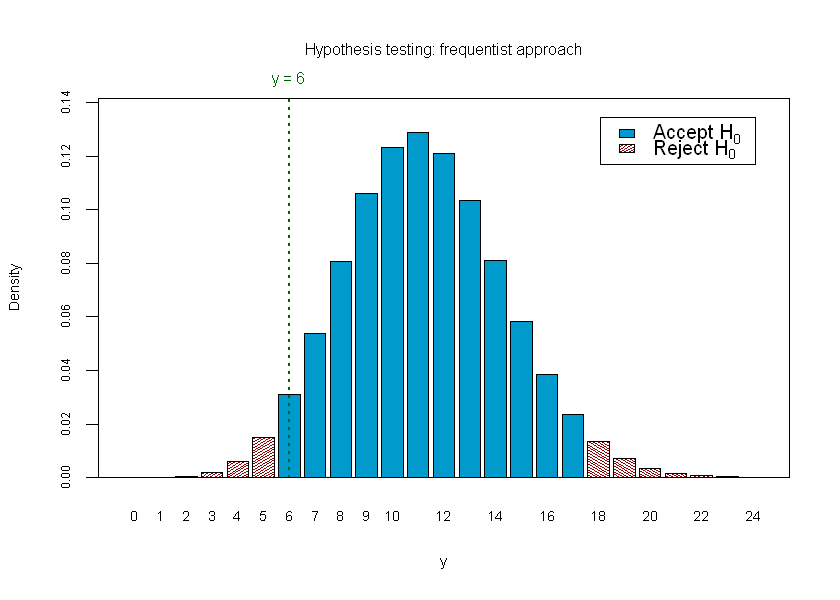

In [12]:
options(repr.plot.width=7, repr.plot.height=5)
barplot(height=pp_test[1:25],
        names.arg=x_test[1:25], 
        density = density[1:25], angle = angle[1:25], col = colors,
        ylim=c(0,1.1*max(pp_test)),
        main = TeX("Hypothesis testing: frequentist approach"), xlab = TeX('$y$'), ylab = TeX('$Density$'),
        cex.lab=0.7, cex.axis=0.6, cex.main=0.8, cex.names = 0.7)
abline(v = 7.9, col="darkgreen", lwd=2, lty=3)
text(7.9, par("usr")[4], labels=expression("y = 6"),  pos=3, cex=0.8, col="darkgreen",  xpd=TRUE)
legend(x="topright", inset=0.05, legend=c(TeX("Accept $H_0$"),TeX("Reject $H_0$")),
       fill=c('deepskyblue3', 'darkred'), density = c(100, 40), angle = c(0, 45))
box()

The null hypothesis $H_0$ is accepted at a significance level of $5\%$ since $y = 6$ lies in the acceptance region.

## Exercise 2

Ladislaus Josephovich Bortkiewicz was a Russian economist and statistician. He noted that the Poisson distribution can be very useful in applied statistics when describing low-frequency events in a large population. In a famous example he showed that the number of deaths by horse kick among the Prussian army follows the Poisson distribution. <br>
Considering the following to sets of observations taken over a fixed large time interval in two different corps:

| $$y$$ death soldiers | $$0$$ | $$1$$ | $$2$$ | $$3$$ | $$4$$ | $$\geq5$$ |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| $$n_1$$ observations | 109 | 65 | 22 | 3 | 1 | 0 |
| $$n_2$$ observations | 144 | 91 | 32 | 11 | 2 | 0 |

### 2.1

Assuming a uniform prior, compute and plot the posterior distribution for $\lambda$, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the $95 \%$ credibility interval.

The likelihood for a single measurement of a Poisson process is 
$$f(x|\mu)=\frac{\mu^x e^{-\mu}}{x!} \text{ with } \mu>0 \text{ and } x = 0,1,...$$ 
in case of multiple indipendent measurements this expression becomes 
$$f(\{x_k\}|\mu) = \prod^n_{k=1} f(x_k|\mu)\propto \mu^{\sum x_k} \cdot e^{-n\mu}$$ 
which has the form of a Gamma distribution:
$$Gamma(x|\alpha,\lambda)=kx^{\alpha-1} e^{-\lambda x}$$

In the case of a prior uniform distribution we can see it as a Gamma function, $Gamma(1,0)$, in the case of a Jeffreys prior as a $Gamma\left(\frac{1}{2},0\right)$.
For a positive uniform prior the posterior is $Gamma(\alpha,\lambda)$ with $$\alpha=\sum_k x_k +1 \text{ and } \lambda = n$$
for a Jeffreys prior the posterior is a $Gamma(\alpha,\lambda)$ with $$\alpha=\sum_k x_k +\frac{1}{2} \text{ and } \lambda = n$$

In [13]:
n1 = c(109,65,22,3,1,0)
n2 = c(144,91,32,11,2,0)

In [14]:
delta.p = 0.01
p = seq(20,60,delta.p)
alpha_u1 = sum(n1)+1
alpha_u2 = sum(n2)+1
lambda = length(n1)
unif_pt1 = dgamma(p,alpha_u1,lambda)/(delta.p*sum(dgamma(p,alpha_u1,lambda)))
unif_pt2 = dgamma(p,alpha_u2,lambda)/(delta.p*sum(dgamma(p,alpha_u2,lambda)))

In [15]:
mean_unif1 = alpha_u1/lambda
var_unif1 = alpha_u1/lambda^2
mean_unif2 = alpha_u2/lambda
var_unif2 = alpha_u2/lambda^2
int1 = cumsum(unif_pt1)*delta.p
int2 = cumsum(unif_pt2)*delta.p
med_unif1 = p[length(which(int1<=0.5))]
med_unif2 = p[length(which(int2<=0.5))]
ci1 = qgamma(c(0.025,0.975), alpha_u1, lambda)
ci2 = qgamma(c(0.025,0.975), alpha_u2, lambda)

In [16]:
cat('**Uniform Prior, first dataset**')
cat('\n\tMean:',round(mean_unif1,4))
cat('\n\tVariance:',round(var_unif1,4))
cat('\n\tMedian:',round(med_unif1,4))
cat('\n\tConfidence interval:',round(ci1[1],4), '', round(ci1[2],4))
cat('\n\n**Uniform Prior, second dataset**')
cat('\n\tMean:',round(mean_unif2,4))
cat('\n\tVariance:',round(var_unif2,4))
cat('\n\tMedian:',round(med_unif2,4))
cat('\n\tConfidence interval:',round(ci2[1],4), '', round(ci2[2],4))

**Uniform Prior, first dataset**
	Mean: 33.5
	Variance: 5.5833
	Median: 33.43
	Confidence interval: 29.0286  38.287

**Uniform Prior, second dataset**
	Mean: 46.8333
	Variance: 7.8056
	Median: 46.77
	Confidence interval: 41.517  52.4653

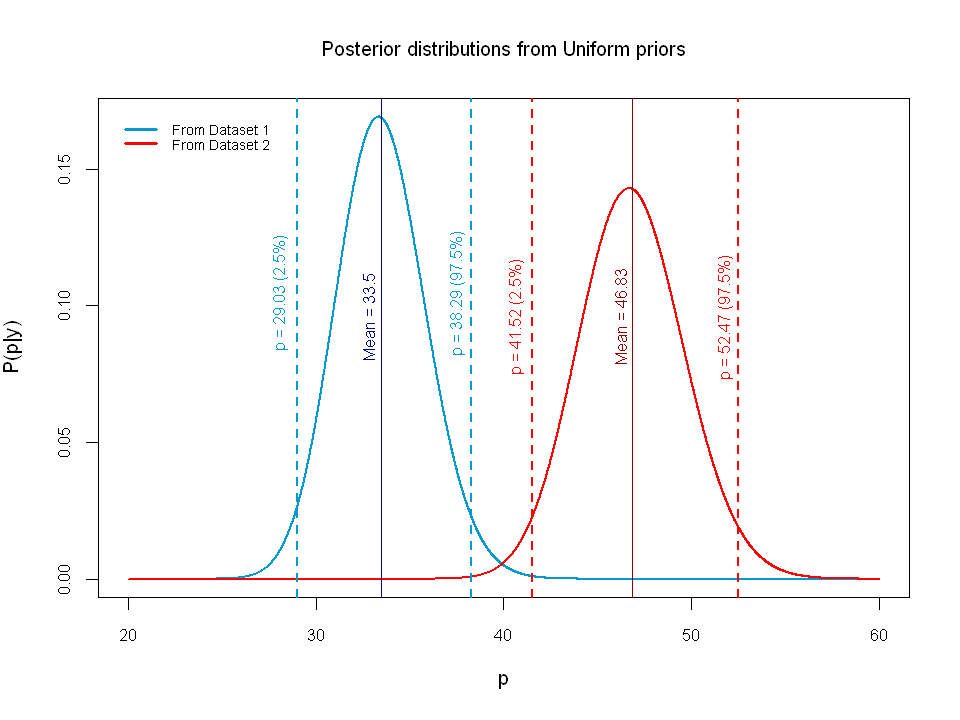

In [17]:
options(repr.plot.width=8, repr.plot.height=6)
plot(p, unif_pt1, main = TeX("Posterior distributions from Uniform priors"),
     col="deepskyblue3",
     xlab = TeX('$p$'), ylab = TeX('$P(p|y)$'), cex.lab=1, cex.axis=0.8, cex.main=1, type='l', lwd=2)
lines(p, unif_pt2, col="red", type='l', lwd=2)
abline(v = ci1[1], col="deepskyblue3", lwd=2, lty=2)
abline(v = ci1[2], col="deepskyblue3", lwd=2, lty=2)
abline(v = mean_unif1, col="darkblue", lwd=1, lty=1)
abline(v = ci2[1], col="red", lwd=2, lty=2)
abline(v = ci2[2], col="red", lwd=2, lty=2)
abline(v = mean_unif2, col="darkred", lwd=1, lty=1)
text(0.98*ci1[1], 0.1, labels=expression("p = 29.03 (2.5%)"), srt=90, pos=3, cex=0.8, col="deepskyblue3",  xpd=TRUE)
text(0.99*ci1[2], 0.1, labels=expression("p = 38.29 (97.5%)"), srt=90, pos=3, cex=0.8, col="deepskyblue3",  xpd=TRUE)
text(0.97*ci2[1], 0.1, labels=expression('p = 41.52 (2.5%)'), pos=1, srt=90, cex=0.8, col="red", xpd=TRUE)
text(0.98*ci2[2], 0.1, labels=expression('p = 52.47 (97.5%)'), srt=90, pos=1, cex=0.8, col="red", xpd=TRUE)
text(0.97*mean_unif1, 0.1, labels=expression('Mean = 33.5'), pos=1, srt=90, cex=0.8, col="darkblue", xpd=TRUE)
text(0.98*mean_unif2, 0.1, labels=expression('Mean = 46.83'), srt=90, pos=1, cex=0.8, col="darkred", xpd=TRUE)
legend(19, 0.17, legend=c("From Dataset 1","From Dataset 2"),
        col=c("deepskyblue3","red"), lty = c(1,1), lwd = c(3,3), cex=0.7, box.lty = 0)

### 2.2

Assuming now a Jeffreys prior

$$
g(\lambda) \propto 1/\sqrt(\lambda) \quad \lambda > 0
$$

compute and plot the posterior distribution for $\lambda$, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the $95 \%$ credibility interval.

In [18]:
alpha_j1 = sum(n1)+0.5
alpha_j2 = sum(n2)+0.5
lambda = length(n1)
jeff_pt1 = dgamma(p,alpha_j1,lambda)/(delta.p*sum(dgamma(p,alpha_j1,lambda)))
jeff_pt2 = dgamma(p,alpha_j2,lambda)/(delta.p*sum(dgamma(p,alpha_j2,lambda)))

In [19]:
mean_jeff1 = alpha_j1/lambda
var_jeff1 = alpha_j1/lambda^2
mean_jeff2 = alpha_j2/lambda
var_jeff2 = alpha_j2/lambda^2
int1 = cumsum(jeff_pt1)*delta.p
int2 = cumsum(jeff_pt2)*delta.p
med_jeff1 = p[length(which(int1<=0.5))]
med_jeff2 = p[length(which(int2<=0.5))]
ci1 = qgamma(c(0.025,0.975), alpha_j1, lambda)
ci2 = qgamma(c(0.025,0.975), alpha_j2, lambda)

In [20]:
cat('**Jeffreys Prior, first dataset**')
cat('\n\tMean:',round(mean_jeff1,4))
cat('\n\tVariance:',round(var_jeff1,4))
cat('\n\tMedian:',round(med_jeff1,4))
cat('\n\tConfidence interval:',round(ci1[1],4), '', round(ci1[2],4))
cat('\n\n**Jeffreys Prior, second dataset**')
cat('\n\tMean:',round(mean_jeff2,4))
cat('\n\tVariance:',round(var_jeff2,4))
cat('\n\tMedian:',round(med_jeff2,4))
cat('\n\tConfidence interval:',round(ci2[1],4), '', round(ci2[2],4))

**Jeffreys Prior, first dataset**
	Mean: 33.4167
	Variance: 5.5694
	Median: 33.35
	Confidence interval: 28.951  38.1979

**Jeffreys Prior, second dataset**
	Mean: 46.75
	Variance: 7.7917
	Median: 46.68
	Confidence interval: 41.4386  52.3771

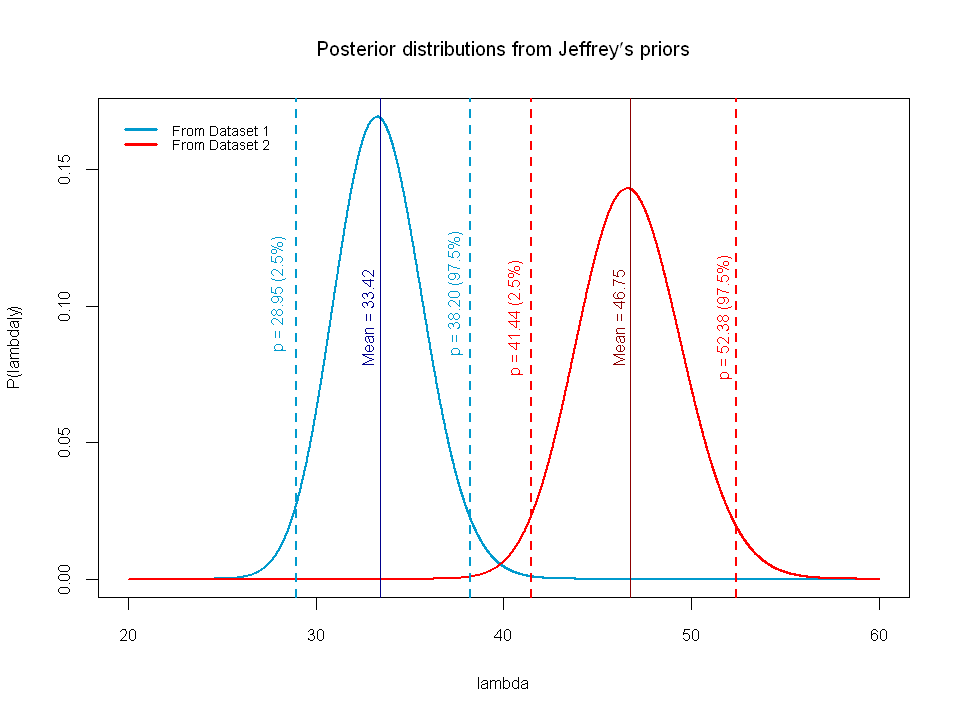

In [21]:
options(repr.plot.width=8, repr.plot.height=6)
plot(p, jeff_pt1, main = TeX("Posterior distributions from Jeffrey's priors"),
     col="deepskyblue3",
     xlab = TeX('$lambda$'), ylab = TeX('$P(lambda|y)$'), cex.lab=0.8, cex.axis=0.8, cex.main=1, type='l', lwd=2)
lines(p, jeff_pt2, col="red", type='l', lwd=2)
abline(v = ci1[1], col="deepskyblue3", lwd=2, lty=2)
abline(v = ci1[2], col="deepskyblue3", lwd=2, lty=2)
abline(v = mean_jeff1, col="darkblue", lwd=1, lty=1)
abline(v = ci2[1], col="red", lwd=2, lty=2)
abline(v = ci2[2], col="red", lwd=2, lty=2)
abline(v = mean_jeff2, col="darkred", lwd=1, lty=1)
text(0.98*ci1[1], 0.1, labels=expression("p = 28.95 (2.5%)"), srt=90, pos=3, cex=0.8, col="deepskyblue3",  xpd=TRUE)
text(0.99*ci1[2], 0.1, labels=expression("p = 38.20 (97.5%)"), srt=90, pos=3, cex=0.8, col="deepskyblue3",  xpd=TRUE)
text(0.97*ci2[1], 0.1, labels=expression('p = 41.44 (2.5%)'), pos=1, srt=90, cex=0.8, col="red", xpd=TRUE)
text(0.98*ci2[2], 0.1, labels=expression('p = 52.38 (97.5%)'), srt=90, pos=1, cex=0.8, col="red", xpd=TRUE)
text(0.97*mean_jeff1, 0.1, labels=expression('Mean = 33.42'), pos=1, srt=90, cex=0.8, col="darkblue", xpd=TRUE)
text(0.98*mean_jeff2, 0.1, labels=expression('Mean = 46.75'), srt=90, pos=1, cex=0.8, col="darkred", xpd=TRUE)
legend(19, 0.17, legend=c("From Dataset 1","From Dataset 2"),
        col=c("deepskyblue3","red"), lty = c(1,1), lwd = c(3,3), cex=0.7, box.lty = 0)

## Exercise 3

In a study on water quality of streams, a high level of bacter $X$ was defined as a level greater than $100$ per $100 \ ml$ of stream water. $n = 116$ samples were taken from streams having a high environmental impact on pandas. Out of these, $y = 11$ had a high bacter $X$ level.<br>

### 3.1

Indicating with $p$ the probability that a sample of water taken from the stream has a high bacter $X$ level find the frequentist estimator for $p$.

In [22]:
n = 116
y = 11
p_freq = y/n
cat('Frequentist estimator for p:', round(p_freq, 3))

Frequentist estimator for p: 0.095

### 3.2

Using a $Beta(1, 10)$ prior for $p$, calculate the posterior distribution $P(p|y)$.

In [23]:
n_p = 1001
p = seq(0, 1, length.out=n_p)
delta.p = p[2] - p[1]
alpha = 1 + 11
beta = 10 + 116 - 11
beta_post = dbeta(p, alpha, beta)/(delta.p*sum(dbeta(p, alpha, beta)))

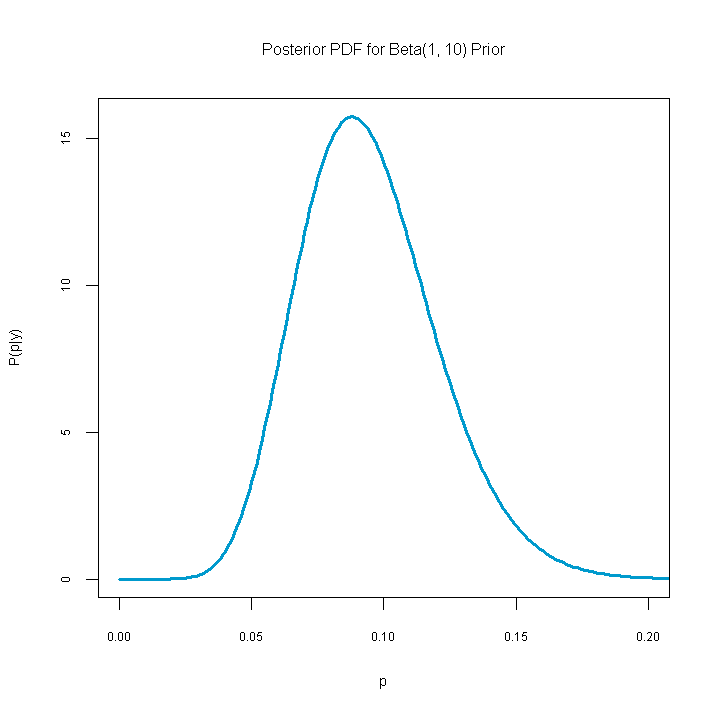

In [24]:
options(repr.plot.width=6, repr.plot.height=6)
plot(p, beta_post, main = TeX("Posterior PDF for Beta(1,10) Prior"),
     col="deepskyblue3", xlim = c(0,0.2), xlab = TeX('$p$'), ylab = TeX('$P(p|y)$'),
     cex.lab=0.7, cex.axis=0.6, cex.main=0.8, type='l', lwd=3)

### 3.3

Find the bayesian estimator for $p$, the posterior mean and variance, and a $95\%$ credible interval.

In [25]:
# posterior mean, which is also the bayesian estimator
p_bay = alpha/(alpha+beta)

# variance
var_beta = (1/(116+2))^2*116*p_bay*(1-p_bay)

# 95% credibility interval
est_beta = qbeta(c(0.025,0.975), alpha, beta)

In [26]:
cat('Bayesian estimator for p:', round(p_bay,3))
cat('\nPosterior mean:', round(p_bay,3))
cat('\nPosterior variance:', round(var_beta, 5))
cat('\n95% credibility interval:', round(est_beta[1],4), '-', round(est_beta[2],3))

Bayesian estimator for p: 0.094
Posterior mean: 0.094
Posterior variance: 0.00071
95% credibility interval: 0.0502 - 0.151

### 3.4

Test the hypotesis

$$H_0: p=0.1 \text{ versus } H_1: p\neq0.1$$

at $5\%$ level of significance with both the frequentist and bayesian approach.


In [27]:
p.H0  = 0.1
alpha_sig = 0.05

x_test = seq.int(0, n, 1)
p_test = pbinom(x_test, n, p.H0)
x_ac = x_test[p_test>0.025 & p_test<0.975] # accepted values
x_rl = x_test[p_test<=0.025] # left rejected values
x_rr = x_test[p_test>=0.975] # right rejected values
pp_test = dbinom(x_test, n, p.H0)

In [28]:
colors = c(rep("darkred", length(x_rl)), rep("deepskyblue3",  length(x_ac)), rep("darkred", length(x_rr)))
density = c(rep(40, length(x_rl)), rep(100, length(x_ac)), rep(40, length(x_rr)))
angle = c(rep(45, length(x_rl)), rep(0, length(x_ac)), rep(135, length(x_rr)))

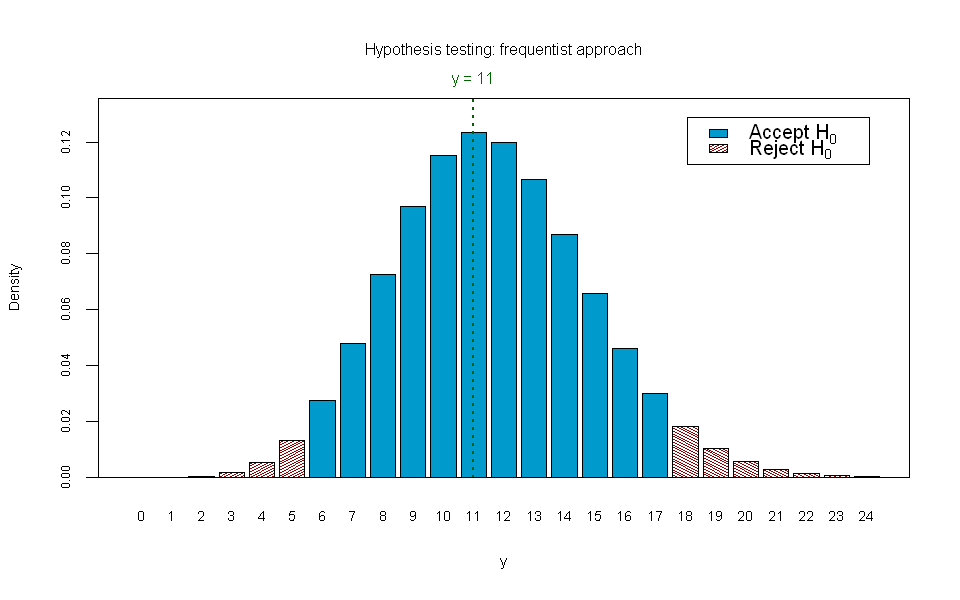

In [29]:
options(repr.plot.width=8, repr.plot.height=5)
barplot(height=pp_test[1:25],
        names.arg=x_test[1:25], 
        density = density[1:25], angle = angle[1:25], col = colors,
        ylim=c(0,1.1*max(pp_test)),
        main = TeX("Hypothesis testing: frequentist approach"), xlab = TeX('$y$'), ylab = TeX('$Density$'),
        cex.lab=0.7, cex.axis=0.6, cex.main=0.8, cex.names = 0.7)
abline(v = 13.9, col="darkgreen", lwd=2, lty=3)
text(13.9, par("usr")[4], labels=expression("y = 11"),  pos=3, cex=0.8, col="darkgreen",  xpd=TRUE)
legend(x="topright", inset=0.05, legend=c(TeX("Accept $H_0$"),TeX("Reject $H_0$")),
       fill=c('deepskyblue3', 'darkred'), density = c(100, 40), angle = c(0, 45))
box()

We can't reject the null hypothesis $H_0$ at a significance level of $5 \%$ since our measurement $y=11$ lies in the acceptance region.

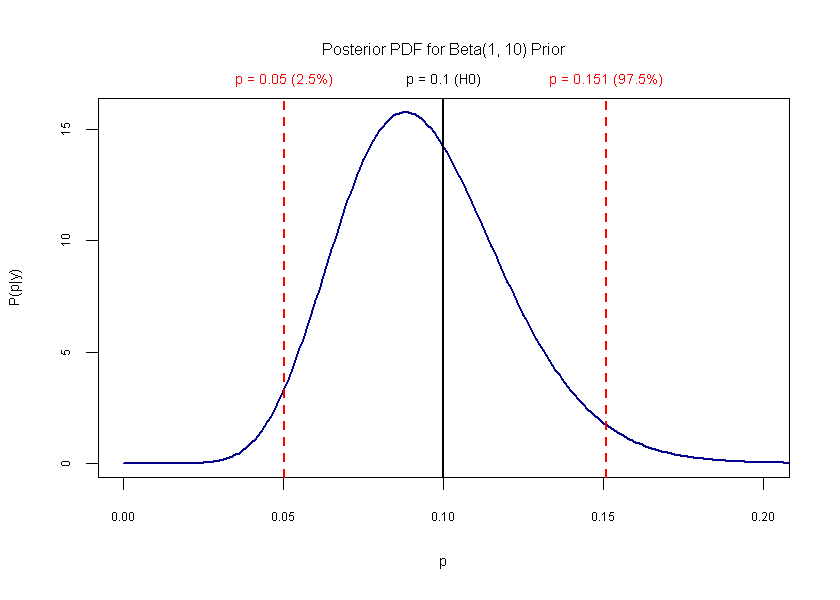

In [30]:
options(repr.plot.width=7, repr.plot.height=5)
plot(p, beta_post, main = TeX("Posterior PDF for Beta(1,10) Prior"),
     xlim=c(0,0.2),
     col="darkblue", xlab = TeX('$p$'), ylab = TeX('$P(p|y)$'), 
     cex.lab=0.7, cex.axis=0.6, cex.main=0.8, type='l', lwd=2)
abline(v = est_beta[1], col="red", lwd=2, lty=2)
abline(v = est_beta[2], col="red", lwd=2, lty=2)
abline(v = p.H0, col="black", lwd=2, lty=1)
text(est_beta[1], par("usr")[4], labels=expression("p = 0.05 (2.5%)"),  pos=3, cex=0.7, col="red",  xpd=TRUE)
text(est_beta[2], par("usr")[4], labels=expression("p = 0.151 (97.5%)"), pos=3, cex=0.7, col="red",  xpd=TRUE)
text(p.H0, par("usr")[4], labels=expression('p = 0.1 (H0)'), pos=3, cex=0.7, col="black", xpd=TRUE)

We can't reject the null hypothesis $H_0$ at a significance level of $5 \%$ since $p_0$ lies in the acceptance region.

A new measurement, performed one month later on $n = 165$ water samples, gives $y = 9$ high bacter $X$ level.
### 3.5

Find the frequentist estimator for $p$.

In [31]:
n = 165
y = 9
p_freq = y/n
cat('Frequentist estimator for p:', round(p_freq, 3))

Frequentist estimator for p: 0.055

### 3.6

Find a bayesian estimator for $p$, assuming both a $Beta(1, 10)$ prior for $p$, and assuming the posterior probability of the older measurement as the prior for the new one.

### 3.7

Find the bayesian estimator for $p$, the posterior mean and variance, and a $95\%$ credible interval.

In [32]:
# for the Beta(1,10) prior
n_p = 1001
p = seq(0, 1, length.out=n_p)
delta.p = p[2] - p[1]
alpha_1 = 1 + y
beta_1 = 10 + n - y
beta_post_1 = dbeta(p, alpha_1, beta_1)/(delta.p*sum(dbeta(p, alpha_1, beta_1)))

# for the posterior of the previous point as prior we have a Beta(12, 115) prior
alpha_2 = 12 + y
beta_2 = 115 + n - y
beta_post_2 = dbeta(p, alpha_2, beta_2)/(delta.p*sum(dbeta(p, alpha_2, beta_2)))

In [33]:
# posterior mean, which is also the bayesian estimator
p_bay_1 = alpha_1/(alpha_1+beta_1)
p_bay_2 = alpha_2/(alpha_2+beta_2)

# variance
var_beta_1 = (1/(n+2))^2*n*p_bay_1*(1-p_bay_1)
var_beta_2 = (1/(n+2))^2*n*p_bay_2*(1-p_bay_2)

# 95% credibility interval
est_beta_1 = qbeta(c(0.025,0.975), alpha_1, beta_1)
est_beta_2 = qbeta(c(0.025,0.975), alpha_2, beta_2)

In [34]:
cat('***Results for Beta(1,10) prior***')
cat('\n \nBayesian estimator for p:', round(p_bay_1,3))
cat('\nPosterior mean:', round(p_bay_1,3))
cat('\nPosterior variance:', round(var_beta_1, 5))
cat('\n95% credibility interval:', round(est_beta_1[1],3), '-', round(est_beta_1[2],3))
cat('\n \n***Results for Beta(12,115) prior***')
cat('\n \nBayesian estimator for p:', round(p_bay_2,3))
cat('\nPosterior mean:', round(p_bay_2,3))
cat('\nPosterior variance:', round(var_beta_2, 5))
cat('\n95% credibility interval:', round(est_beta_2[1],3), '-', round(est_beta_2[2],3))

***Results for Beta(1,10) prior***
 
Bayesian estimator for p: 0.057
Posterior mean: 0.057
Posterior variance: 0.00032
95% credibility interval: 0.028 - 0.095
 
***Results for Beta(12,115) prior***
 
Bayesian estimator for p: 0.072
Posterior mean: 0.072
Posterior variance: 0.00039
95% credibility interval: 0.045 - 0.104

### 3.8 

Test the hypotesis
$$H_0: p=0.1 \text{ versus } H_1: p\neq0.1$$
at $5\%$ level of significance with both the frequentist and bayesian approach.

In [35]:
p.H0  = 0.1
alpha_sig = 0.05

x_test = seq.int(0, n, 1)
p_test = pbinom(x_test, n, p.H0)
x_ac = x_test[p_test>0.03 & (1-p_test)>0.02] # accepted values
x_rl = x_test[p_test<=0.03] # left rejected values
x_rr = x_test[(1-p_test)<=0.02] # right rejected values
pp_test = dbinom(x_test, n, p.H0)

In [36]:
colors = c(rep("darkred", length(x_rl)), rep("deepskyblue3",  length(x_ac)), rep("darkred", length(x_rr)))
density = c(rep(40, length(x_rl)), rep(100, length(x_ac)), rep(40, length(x_rr)))
angle = c(rep(45, length(x_rl)), rep(0, length(x_ac)), rep(135, length(x_rr)))

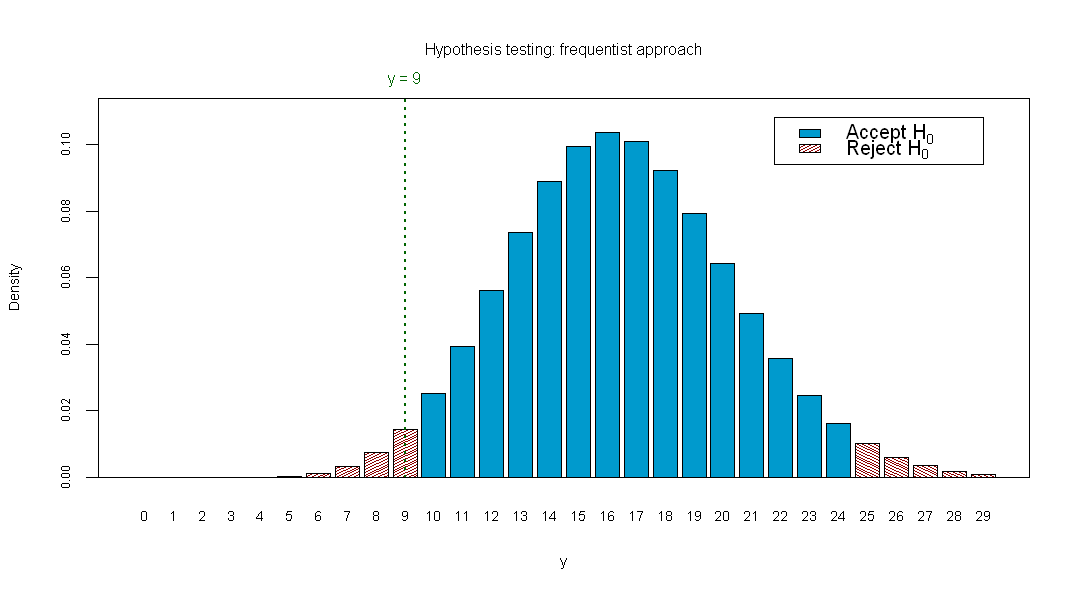

In [37]:
options(repr.plot.width=9, repr.plot.height=5)
barplot(height=pp_test[1:30],
        names.arg=x_test[1:30], 
        density = density[1:30], angle = angle[1:30], col = colors,
        ylim=c(0,1.1*max(pp_test)),
        main = TeX("Hypothesis testing: frequentist approach"), xlab = TeX('$y$'), ylab = TeX('$Density$'),
        cex.lab=0.7, cex.axis=0.6, cex.main=0.8, cex.names=0.7)
abline(v = 11.5, col="darkgreen", lwd=2, lty=3)
text(11.5, par("usr")[4], labels=expression("y = 9"),  pos=3, cex=0.8, col="darkgreen",  xpd=TRUE)
legend(x="topright", inset=0.05, legend=c(TeX("Accept $H_0$"),TeX("Reject $H_0$")),
       fill=c('deepskyblue3', 'darkred'), density = c(100, 40), angle = c(0, 45))
box()

We can reject the null hypothesis $H_0$ at a significance level of $5 \%$ since our measurement $y=9$ lies in the reject region.

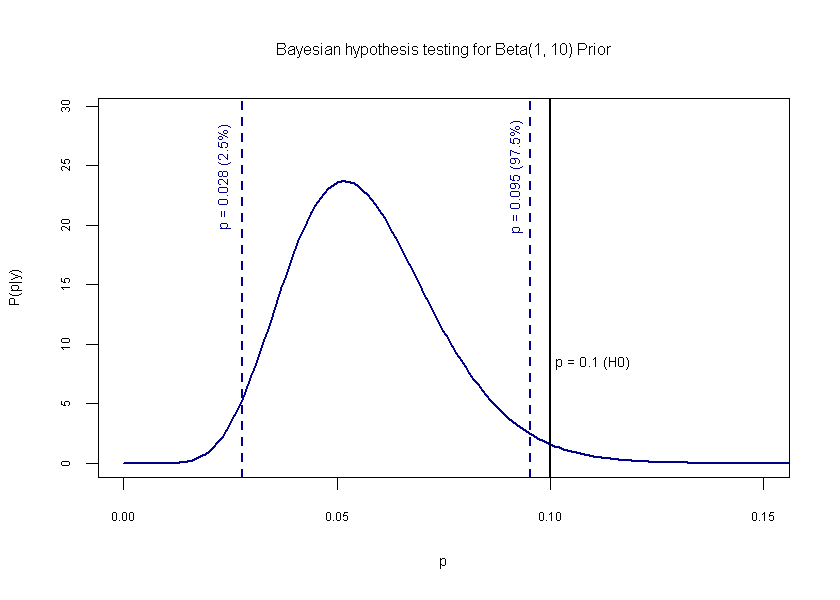

In [38]:
options(repr.plot.width=7, repr.plot.height=5)
plot(p, beta_post_1, main = TeX("Bayesian hypothesis testing for Beta(1,10) Prior"),
     xlim=c(0,0.15), ylim=c(0,1.1*max(beta_post_2)),
     col="darkblue", xlab = TeX('$p$'), ylab = TeX('$P(p|y)$'), 
     cex.lab=0.7, cex.axis=0.6, cex.main=0.8, type='l', lwd=2)
abline(v = est_beta_1[1], col="darkblue", lwd=2, lty=2)
abline(v = est_beta_1[2], col="darkblue", lwd=2, lty=2)
abline(v = p.H0, col="black", lwd=2, lty=1)
text(0.9*est_beta_1[1], 23, labels=expression("p = 0.028 (2.5%)"), srt=90, pos=3, cex=0.7, col="darkblue",  xpd=TRUE)
text(0.98*est_beta_1[2], 23, labels=expression("p = 0.095 (97.5%)"), srt=90, pos=3, cex=0.7, col="darkblue",  xpd=TRUE)
text(1.1*p.H0, 10, labels=expression('p = 0.1 (H0)'), pos=1, cex=0.7, col="black", xpd=TRUE)

We can reject the null hypothesis $H_0$ at a significance level of $5 \%$ since our measurement $p_0$ lies outside the acceptance region.

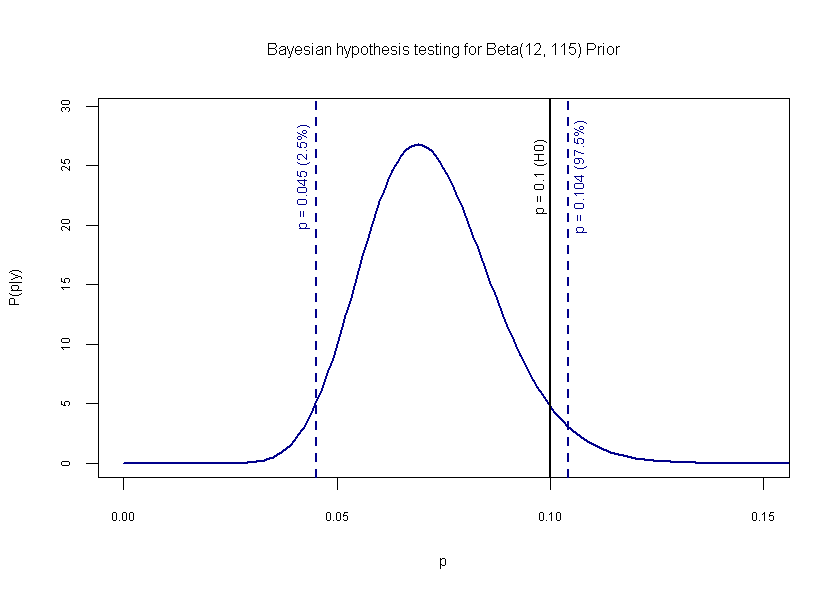

In [39]:
options(repr.plot.width=7, repr.plot.height=5)
plot(p, beta_post_2, main = TeX("Bayesian hypothesis testing for Beta(12,115) Prior"),
     xlim=c(0,0.15), ylim=c(0,1.1*max(beta_post_2)),
     col="darkblue", xlab = TeX('$p$'), ylab = TeX('$P(p|y)$'), 
     cex.lab=0.7, cex.axis=0.6, cex.main=0.8, type='l', lwd=2)
abline(v = est_beta_2[1], col="darkblue", lwd=2, lty=2)
abline(v = est_beta_2[2], col="darkblue", lwd=2, lty=2)
abline(v = p.H0, col="black", lwd=2, lty=1)
text(0.96*est_beta_2[1], 23, labels=expression("p = 0.045 (2.5%)"), srt=90, pos=3, cex=0.7, col="darkblue",  xpd=TRUE)
text(1.04*est_beta_2[2], 23, labels=expression("p = 0.104 (97.5%)"), srt=90,pos=3, cex=0.7, col="darkblue",  xpd=TRUE)
text(0.96*p.H0, 25, labels=expression('p = 0.1 (H0)'), srt=90, pos=1, cex=0.7, col="black", xpd=TRUE)

We can't reject the null hypothesis $H_0$ at a significance level of $5 \%$ since $p_0$ lies in the acceptance region.